In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
articles = pd.read_csv('cleaned_articles.csv')

In [17]:
articles['Date'] = pd.to_datetime(articles['Date'])
articles['year'] = articles['Date'].dt.year
articles.head()

/tmp/ipykernel_23135/3207752553.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  articles['Date'] = pd.to_datetime(articles['Date'])


,Title,Date,Description,year
0,why mission divyastra is significant what it ...,2024-03-11,new delhi the successful launch of mission div...,2024
1,agniv test firing puts india in elite list of ...,2024-03-11,new delhi prime minister narendra modi on mond...,2024
2,maharashtra ats arrests mazagon dockyard emplo...,2024-03-11,new delhi the antiterrorism squad ats of the m...,2024
3,india remains worlds largest arms importer fra...,2024-03-11,new delhi india continues to be the worlds top...,2024
4,chinese research vessel enters bay of bengal d...,2024-03-11,new delhi days before planned missile tests by...,2024


In [20]:
articles = articles.drop_duplicates(subset=['Title'])
articles = articles[articles['Description'].notna()]
articles.reset_index(drop=True, inplace=True)
articles.tail()

,Title,Date,Description,year
12278,contracts for jan 4 2019,2019-01-04,army avon protection systems cadillac michigan...,2019
12279,one mean airplane,2019-01-04,the f35c lightning ii is the navys aircraft ca...,2019
12280,contracts for jan 3 2019,2019-01-03,defense intelligence agency fulcrum it service...,2019
12281,shanahan stresses national defense strategy in...,2019-01-03,acting defense secretary patrick m shanahan wi...,2019
12282,10 things you probably didnt know about the pe...,2019-01-03,1 why is the pentagon you know a pentagon the ...,2019


In [21]:
# Count the number of articles per year
article_counts = articles['year'].value_counts().sort_index()

# Fill in missing years with zero counts
article_counts = article_counts.reindex(range(2019, 2025), fill_value=0)

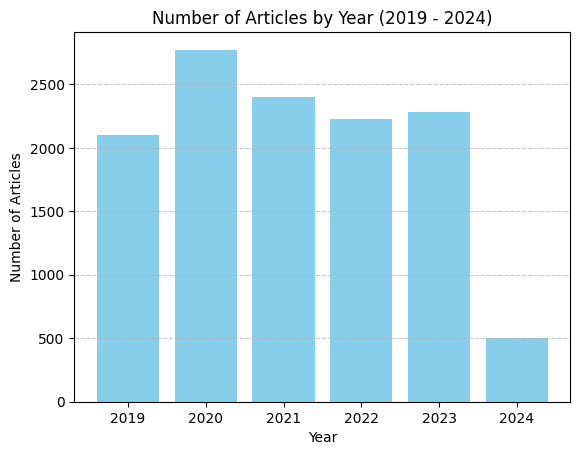

In [22]:
# Plotting
plt.bar(article_counts.index, article_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Year (2019 - 2024)')
plt.xticks(range(2019, 2025))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

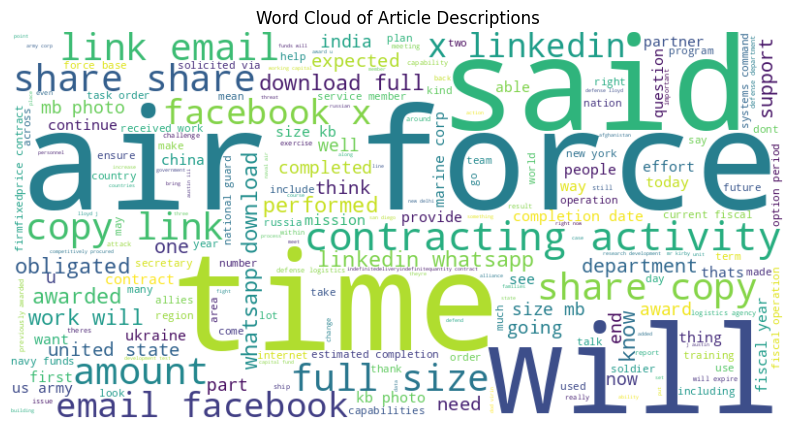

In [23]:
# Combine all descriptions into a single string
text = ' '.join(articles['Description'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Descriptions')
plt.show()

/tmp/ipykernel_23135/1187208660.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = articles.resample('M', on='Date').size()


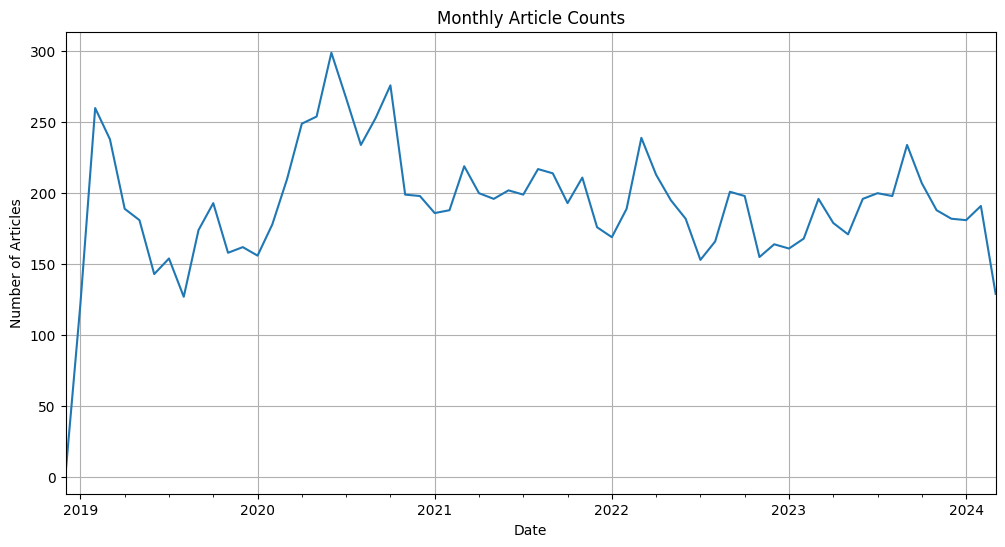

In [25]:
# Group articles by month and count the number of articles in each month
monthly_counts = articles.resample('M', on='Date').size()

# Plot time series of article counts
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Article Counts')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()
